# Using sample data

In [1]:
import numpy as np
import pandas as pd
import graphviz
import lingam
from lingam.utils import make_prior_knowledge, make_dot

import warnings
warnings.filterwarnings('ignore')

print([np.__version__, pd.__version__, graphviz.__version__, lingam.__version__])

np.set_printoptions(precision=3, suppress=True)
np.random.seed(0)

['1.21.3', '1.3.2', '0.17', '1.5.4']


## Standard data
* 6 variables

[3, 0, 2, 4, 5, 1]


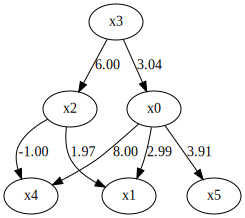

In [2]:
X = pd.read_csv('data/6vars.csv')
model = lingam.DirectLiNGAM()
model.fit(X)
print(model.causal_order_)
make_dot(model.adjacency_matrix_)

## Time series data for VAR
* 5 variables

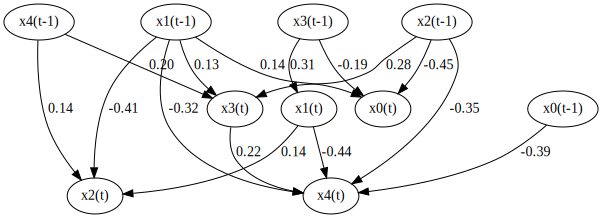

In [3]:
X = pd.read_csv('data/5vars_var.csv')
model = lingam.VARLiNGAM()
model.fit(X)
labels = ['x0(t)', 'x1(t)', 'x2(t)', 'x3(t)', 'x4(t)', 'x0(t-1)', 'x1(t-1)', 'x2(t-1)', 'x3(t-1)', 'x4(t-1)']
make_dot(np.hstack(model.adjacency_matrices_), ignore_shape=True, lower_limit=0.05, labels=labels)

## Time series data for VARMA
* 5 variables

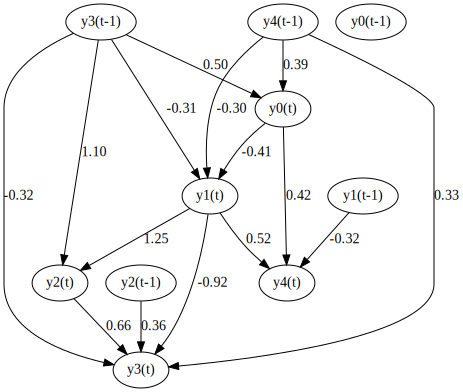

In [4]:
X = pd.read_csv('data/5vars_varma.csv')
model = lingam.VARMALiNGAM(order=(1, 1), criterion=None)
model.fit(X)
labels = ['y0(t)', 'y1(t)', 'y2(t)', 'y3(t)', 'y4(t)', 'y0(t-1)', 'y1(t-1)', 'y2(t-1)', 'y3(t-1)', 'y4(t-1)']
make_dot(np.hstack(model.adjacency_matrices_[0]), lower_limit=0.3, ignore_shape=True, labels=labels)

## Longitudinal data
* 5 variables

In [5]:
n_features = 5
n_samples = 200
n_lags = 1
n_timepoints = 3

X_t = np.empty((n_timepoints, n_samples, n_features))
for t in range(n_timepoints):
    X_t[t] = pd.read_csv(f"data/5vars_longitudinal_t{t}.csv").values

model = lingam.LongitudinalLiNGAM(n_lags=n_lags)
model = model.fit(X_t)

t = 1
print('B(1,1):')
print(model.adjacency_matrices_[t, 0])
print('B(1,0):')
print(model.adjacency_matrices_[t, 1])

t = 2
print('B(2,2):')
print(model.adjacency_matrices_[t, 0])
print('B(2,1):')
print(model.adjacency_matrices_[t, 1])

B(1,1):
[[ 0.     0.099  0.     0.    -0.52 ]
 [ 0.     0.     0.     0.398  0.   ]
 [ 0.     0.384  0.    -0.162  0.   ]
 [ 0.     0.     0.     0.     0.   ]
 [ 0.    -0.249 -0.074  0.     0.   ]]
B(1,0):
[[ 0.025  0.116 -0.202  0.054 -0.216]
 [ 0.139 -0.211 -0.43   0.558  0.051]
 [-0.135  0.178  0.421  0.173  0.031]
 [ 0.384 -0.083 -0.495 -0.072 -0.323]
 [-0.206 -0.354 -0.199 -0.293  0.468]]
B(2,2):
[[ 0.     0.     0.     0.     0.   ]
 [ 0.     0.    -0.67   0.     0.46 ]
 [ 0.187  0.     0.     0.     0.   ]
 [ 0.     0.    -0.341  0.     0.   ]
 [ 0.25   0.     0.     0.     0.   ]]
B(2,1):
[[ 0.194  0.2    0.031 -0.473 -0.002]
 [-0.384 -0.037  0.158  0.255  0.095]
 [ 0.126  0.275 -0.048  0.502 -0.019]
 [ 0.238 -0.469  0.475 -0.029 -0.176]
 [-0.177  0.309 -0.112  0.295 -0.273]]


## The top variable is the latent variable
* 6 variables

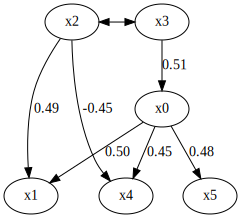

In [6]:
X = pd.read_csv('data/6vars_top_latent.csv')
model = lingam.BottomUpParceLiNGAM()
model.fit(X)
make_dot(model.adjacency_matrix_)

## The middle variable is the latent variable
* 6 variables

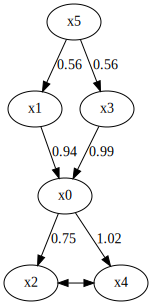

In [7]:
X = pd.read_csv('data/6vars_mid_latent.csv')
model = lingam.RCD()
model.fit(X)
make_dot(model.adjacency_matrix_)